Part A — Dataset datasheet + data-quality audit  
1. Create a short dataset datasheet with: motivation, target definition, data source +
license/terms, a brief feature dictionary (top features and types), and known
limitations/risks.
2. Perform a quick data-quality audit: missingness summary, duplicate rows check, target
distribution, and one bias/ethics consideration relevant to your dataset.
3. Create a leakage-risk note. Identify at least 1–2 plausible leakage vectors (e.g., IDs,
timestamps, post-outcome fields, duplicates) and state how you will prevent them.


#Motivation:

Purpose: It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Goal: Binary Classification of Fradulent & Genuine Credit Card Transactions


#Target Definition:
- Class (binary): 1 for fraudulent transactions, 0 otherwise


#Data Source: Kaggle Credit Card Fraud Detection

License: http://opendatacommons.org/licenses/dbcl/1.0/

Access: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

Source: The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project


#Feature Dictionary:
- Time (integer): Number of seconds elapsed between this transaction and the first transaction in the dataset
- V1-V28 (numerical): result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)
- Amount (numerical): Transaction amount


#Limitations/Risks:
- The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions
- It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


In [ ]:
import pandas as pd
import os
df = pd.read_csv(os.path.join(path, "creditcard.csv"))
df.head()
#print(f"Dataset loaded: {df.shape[0]:,} rows, {df.shape[1]} features")


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# missingness summary
print(f"Dataset loaded: {df.shape[0]:,} rows, {df.shape[1]} features")
missing_total=df.isnull().sum().sum()
print(f"Total missing values: {missing_total}")


Dataset loaded: 284,807 rows, 31 features
Total missing values: 0


In [ ]:
# duplicate rows check
duplicated_rows = df.duplicated().sum()

print("Total duplicated rows: {}".format(duplicated_rows))

Total duplicated rows: 1081


/tmp/ipython-input-2717412398.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df,palette='viridis')


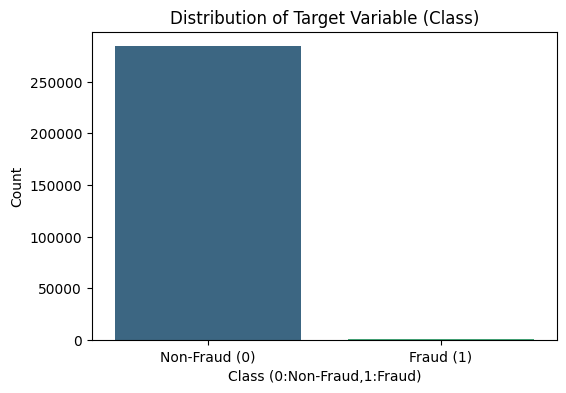

In [ ]:
# target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df,palette='viridis')
plt.title('Distribution of Target Variable (Class)')
plt.xlabel('Class (0:Non-Fraud,1:Fraud)')
plt.ylabel('Count')
plt.xticks([0,1],['Non-Fraud (0)','Fraud (1)'])
plt.show()

### Bias / Ethics Consideration

This dataset exhibits extreme class imbalance, with fraudulent transactions accounting for approximately 0.17% of all observations. Such imbalance can bias models toward predicting the majority (non-fraud) class, resulting in poor detection of fraudulent activity if accuracy is used as the primary evaluation metric. To mitigate this issue, model performance should be assessed using metrics such as precision, recall, and F1-score for the fraud class, and imbalance-aware techniques (e.g., class weighting or resampling) should be considered.

In addition, the features are anonymized using PCA transformations, which protects cardholder privacy but prevents analysis of potential demographic or contextual biases. As a result, fairness across different cardholder subpopulations cannot be directly evaluated. Finally, the dataset contains transactions from European cardholders over a limited two-day period, which may restrict generalizability to other regions or time periods. These limitations should be documented and considered when interpreting results or deploying models trained on this dataset.


In [ ]:
df['Class'].value_counts(normalize=True).round(4)


## leakage-risk note
In this dataset (features: V1–V28, Time, Amount), there are no explicit post-outcome variables. However, **Time and Amount** together can still introduce a leakage-like shortcut if the dataset is randomly split. For example, fraud transactions may occur in specific time ranges and have distinctive amount patterns, so the model can exploit distribution differences across time rather than learning general fraud behavior. This can inflate performance because in real deployment the model must generalize to future time periods.

Prevention: I will mitigate this risk by using a time-aware split (train on earlier time, test on later time), and/or validating performance across multiple splits to ensure results are not driven purely by Time/Amount patterns.

Part B — Leakage-safe preprocessing and baselines (Week 1)

4. Implement a leakage-safe split strategy using a single train/test split. If the dataset has time
ordering, use a time-based split (e.g., last 20% as test) or briefly justify why not.
5. Build a single scikit-learn Pipeline (use ColumnTransformer only if you have mixed
numeric/categorical features) so preprocessing is fit only on the training set.
6. Train one simple baseline model (choose one: Gaussian Naive Bayes, kNN, or
Ridge/ElasticNet for regression). A trivial baseline is optional.
7. Report one primary metric on the test set (accuracy/F1 for classification; MAE/RMSE for
regression) and include one small supporting artifact (confusion matrix for classification OR
a residual summary for regression).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score

In [ ]:
# sort by time to preserve temporal order
df_sorted = df.sort_values("Time").reset_index(drop=True)

X = df_sorted.drop(columns=["Class"])
y = df_sorted["Class"]

# time-based split: last 20% as test
split_idx = int(len(df_sorted) * 0.8)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print(X_train.shape, X_test.shape)


(227845, 30) (56962, 30)


In [ ]:
#part b number 5
pipeline = Pipeline([
    ('scaler', StandardScaler()),#Scales all numeric features (fit on train only)
    ('classifier', GaussianNB())#Gaussian Naive Bayes baseline (non-tree), probability model based on normal distribution
])

pipeline.fit(X_train, y_train)

print("Train fraud rate:", y_train.mean())
print("Test fraud rate:", y_test.mean())

Train fraud rate: 0.001830191577607584
Test fraud rate: 0.001316667251852112


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)

# X = features, y = target
X = df.drop(columns=["Class"])
y = df["Class"]

# stratified split to preserve imbalance ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train baseline model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict
y_pred = gnb.predict(X_test)

# Probabilities (for AUC)
y_prob = gnb.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("F1 Score :", f1_score(y_test, y_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)

dummy_pred = dummy.predict(X_test)

print("Dummy Accuracy:", accuracy_score(y_test, dummy_pred))
print("Dummy F1      :", f1_score(y_test, dummy_pred, zero_division=0))


Accuracy : 0.9922755521224677
Precision: 0.13771186440677965
Recall   : 0.6632653061224489
F1 Score : 0.22807017543859648
ROC-AUC  : 0.967730650574805

Confusion Matrix:
 [[56457   407]
 [   33    65]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.66      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.83      0.61     56962
weighted avg       1.00      0.99      0.99     56962


ROC-AUC: 0.967730650574805
Dummy Accuracy: 0.9982795547909132
Dummy F1      : 0.0


## Baseline Model Results (Gaussian Naive Bayes)

### Primary Metric (Test Set): F1 Score
Since the fraud detection dataset is **highly imbalanced** (far more Non-Fraud than Fraud), accuracy alone can be misleading. Therefore, I use the **F1 score** as the primary evaluation metric.

On the test set, the **Gaussian Naive Bayes baseline model achieved**:

- **Accuracy:** 0.9923  
- **Precision:** 0.1377  
- **Recall:** 0.6633  
- **F1 Score (primary metric):** **0.2281**  
- **ROC-AUC:** 0.9677  

---

### Supporting Artifact: Confusion Matrix (Test Set)

Confusion Matrix:

\[
\begin{bmatrix}
56457 & 407 \\
33 & 65
\end{bmatrix}
\]

Where:
- **TN = 56,457** (Non-Fraud correctly predicted as Non-Fraud)
- **FP = 407** (Non-Fraud incorrectly predicted as Fraud)
- **FN = 33** (Fraud incorrectly predicted as Non-Fraud)
- **TP = 65** (Fraud correctly predicted as Fraud)

**Interpretation:**  
The baseline model achieves a relatively high **recall (0.6633)** for fraud cases (detects many frauds), but the **precision is low (0.1377)** due to many false positives, resulting in a modest overall **F1 score of 0.2281**.

---

### Trivial Baseline Comparison (Dummy Classifier)
A trivial baseline that always predicts the majority class (**Non-Fraud**) achieved:

- **Dummy Accuracy:** 0.9983  
- **Dummy F1 Score:** 0.0  

Although the dummy classifier has higher accuracy, it detects **no fraud cases** at all, which confirms that **F1 score is more informative than accuracy** for this imbalanced classification problem.
